In [1]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier

In [2]:
ds=pd.read_csv('C://Users/user/Downloads/train.csv')

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24169 entries, 0 to 24168
Data columns (total 26 columns):
Unnamed: 0                    24169 non-null int64
ID                            24169 non-null int64
LIMIT_BAL                     24169 non-null int64
SEX                           24169 non-null int64
EDUCATION                     24169 non-null int64
MARRIAGE                      24169 non-null int64
AGE                           24169 non-null int64
PAY_0                         24169 non-null int64
PAY_2                         24169 non-null int64
PAY_3                         24169 non-null int64
PAY_4                         24169 non-null int64
PAY_5                         24169 non-null int64
PAY_6                         24169 non-null int64
BILL_AMT1                     24169 non-null int64
BILL_AMT2                     24169 non-null int64
BILL_AMT3                     24169 non-null int64
BILL_AMT4                     24169 non-null int64
BILL_AMT5               

In [4]:
ds.describe()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,24169.000000,24169.000000,24169.000000,24169.000000,24169.000000,24169.000000,24169.000000,24169.000000,24169.000000,24169.000000,...,24169.000000,24169.000000,24169.000000,24169.000000,2.416900e+04,24169.000000,24169.000000,24169.000000,24169.000000,24169.000000
mean,15031.693161,15032.693161,167391.024867,1.605817,1.853076,1.550871,35.469444,-0.018453,-0.135504,-0.164963,...,43153.864372,40156.224585,38738.109603,5681.134759,5.942295e+03,5213.239935,4801.607017,4803.390128,5252.875047,0.218420
std,8661.614261,8661.614261,129519.754764,0.488685,0.790629,0.520981,9.193634,1.123273,1.195428,1.195498,...,64197.409775,60531.338697,59314.750357,16895.052567,2.331366e+04,16984.502935,15798.979087,15282.699900,17668.019737,0.413183
min,0.000000,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7555.000000,7556.000000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,...,2360.000000,1776.000000,1256.000000,1000.000000,8.200000e+02,392.000000,295.000000,265.000000,150.000000,0.000000
50%,15049.000000,15050.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,...,18981.000000,18043.000000,16921.000000,2100.000000,2.005000e+03,1804.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22555.000000,22556.000000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,...,54078.000000,50147.000000,49062.000000,5006.000000,5.000000e+03,4504.000000,4000.000000,4026.000000,4001.000000,0.000000
max,29999.000000,30000.000000,800000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,...,706864.000000,823540.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
ds.isnull().sum()

Unnamed: 0                    0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Text(0.5, 1.0, 'SEX v/s COUNT')

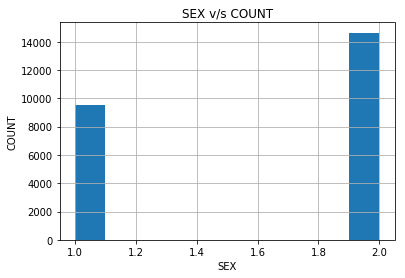

In [8]:
# SEX VS COUNT plot
ds['SEX'].hist()
plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.title('SEX v/s COUNT')

# Number of Male credit holder is less than Female

Text(0.5, 1.0, 'Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

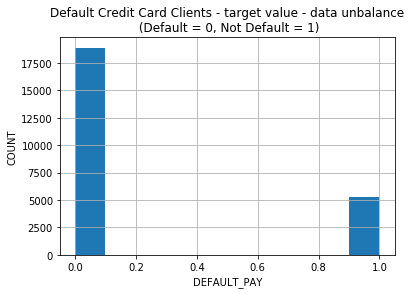

In [9]:
# Defaulters vs Non Defaulters
ds['default payment next month'].hist()
plt.xlabel('DEFAULT_PAY')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

Percentage of Defaulters are smaller than the Non Defaulters in the given dataset

Text(0.5, 1.0, 'EDUCATION v/s COUNT')

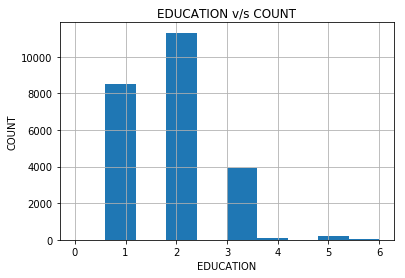

In [10]:
# Education vs count histogrme plot
ds['EDUCATION'].hist()
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('EDUCATION v/s COUNT')

More number of credit holders are university students followed by Graduates and then High school students

Text(0.5, 1.0, 'MARRIAGE v/s COUNT')

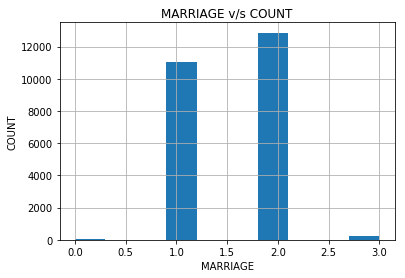

In [11]:
# Marriage vs count histograme plot
ds['MARRIAGE'].hist()
plt.xlabel('MARRIAGE')
plt.ylabel('COUNT')
plt.title('MARRIAGE v/s COUNT')

More number of credit cards holder are Married

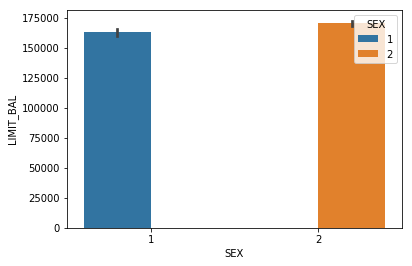

In [12]:
# LIMIT Balance vs Gender plot
sns.barplot(x='SEX',y='LIMIT_BAL',data=ds,hue='SEX')

Average of Limit Balance gender wise, 1 - Male, 2 - Female . Here we can see that average of Limit Balance for Female is more than male

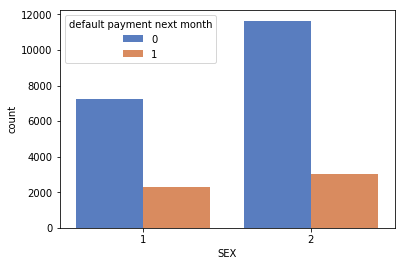

In [13]:
# Checking the number of counts of defaulters and non defaulters genderwise

sns.countplot(x='SEX', data=ds,hue="default payment next month", palette="muted")

it is evident from the above output that females have overall less default payments wrt males

Non-Defaults have a higher proportion of Females (Sex=2)

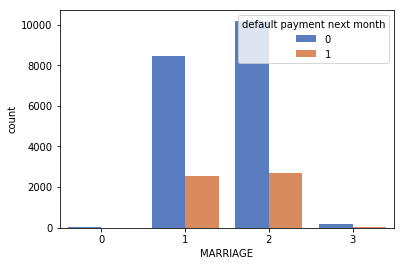

In [14]:
# Checking the number of counts of defaulters and non defaulters depending on marriage status
sns.countplot(x="MARRIAGE", data=ds,hue="default payment next month", palette="muted")

From the above plot it is clear that those people who have marital status single have less default payment wrt married status people

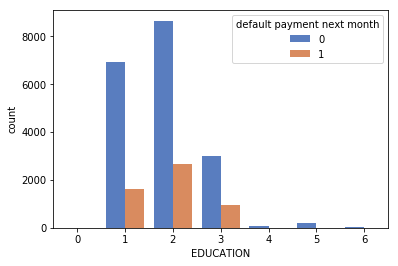

In [15]:
# Checking the number of counts of defaulters and non defaulters depending on education status
sns.countplot(x="EDUCATION", data=ds,hue="default payment next month", palette="muted")

From the above plot it is clear that those people who are university students have less default payment wrt graduates and high school people

# The below figure shows bar plot for each month payment status which show the count of defaulters and non-defaulter.

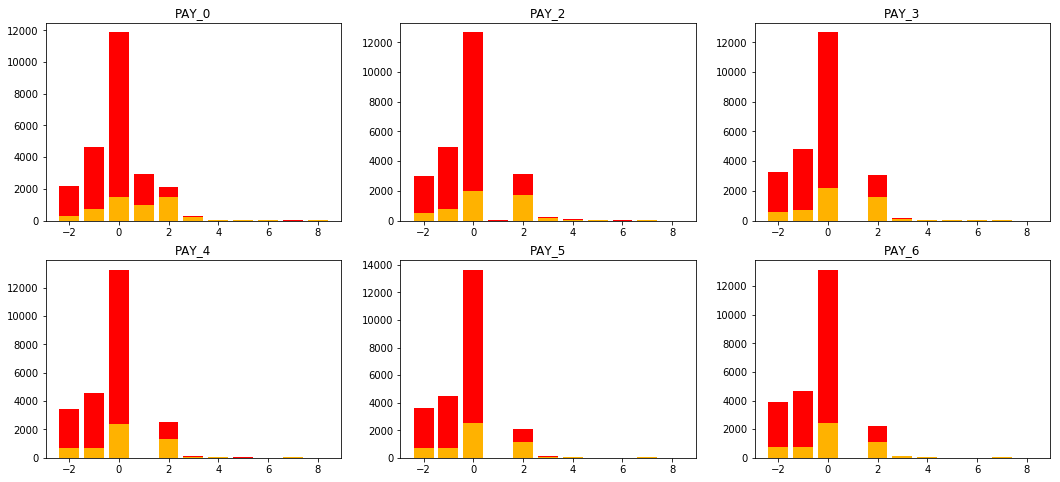

In [16]:
#yellow bar is for defaulter(1) against red bar non-defaulter(0)
pay_status_columns=['PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = ds[pay_status_columns[i]].value_counts()
    x = ds[pay_status_columns[i]][(ds['default payment next month']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='red')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])

# The below histogram shows the distribution of payment amount for each month explicitly for defaulters and non-defaulters

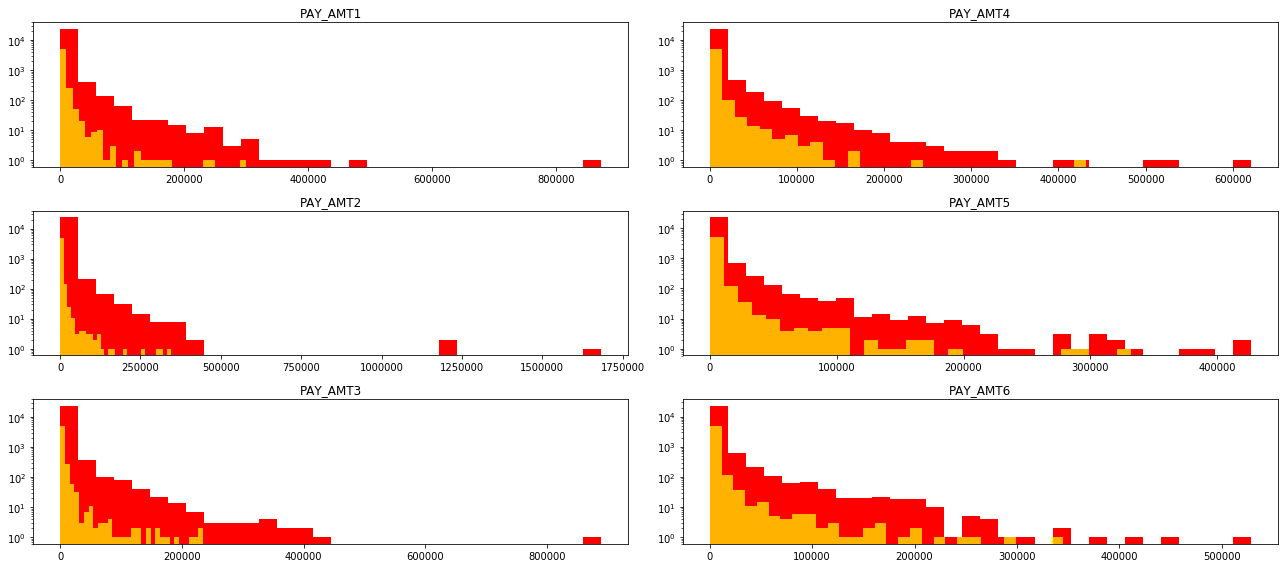

In [17]:
#yellow color is for defaulter(1) against red color non-defaulter(0)
pay_amt_columns = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)


for i in range(len(pay_amt_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(ds[pay_amt_columns[i]], 30, color ='red')
    ax[row,col].hist(ds[pay_amt_columns[i]][(ds['default payment next month']==1)],30,color='yellow',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

# The below histogram shows the distribution of Bill amount generated for each month explicitly for defaulters and non-defaulters

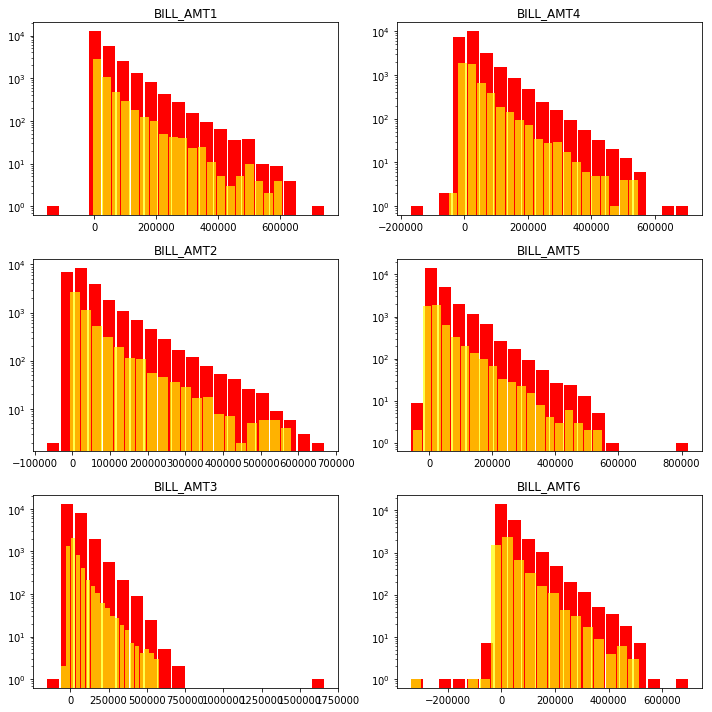

In [18]:
#yellow color is for defaulter(1) against red color is for non-defaulter(0)
bill_atm_columns =  ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(ds[bill_atm_columns[i]], 20,rwidth=0.9, color ='red')
    ax[row,col].hist(ds[bill_atm_columns[i]][(ds['default payment next month']==1)],20,rwidth=0.9,color='yellow',alpha = 0.7)
    ax[row,col].set_title(bill_atm_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

# Data Preprocessing ,Creating a training dataframe X from dataframe ds after dropping below columns. X will have only features. For label we are storing it in a y vector

In [ ]:
X=ds.drop(labels=['default payment next month','Unnamed: 0','ID'],axis=1)
X=X.rename(columns={'PAY_0':'PAY_1'})
y=ds['default payment next month']
X.columns
#Z=Z.drop(['Unnamed: 0','ID'],axis=1)

Education categories 0,5,6 are not describled hence creating a new category 'others' represented by number 4
Marriage 0 category is not documented hence creating a new category 3

In [ ]:
X.loc[(X['EDUCATION'] == 5) | (X['EDUCATION'] == 6) | (X['EDUCATION'] == 0), 'EDUCATION'] = 4
X['EDUCATION'].unique()
X.loc[X['MARRIAGE'] == 0, 'MARRIAGE'] = 3
X['MARRIAGE'].unique()

Categorizing money amount for smooth computation. Categorization changes over each 100000 , anything below 100000 is 0 and anything above 800000 is 8

In [ ]:
cols=['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
for col in cols:
    X.loc[(X[col] <= 100000),col] = 0
    X.loc[(X[col] > 100000) & (X[col] <= 200000),col] = 1
    X.loc[(X[col] > 200000) & (X[col] <= 300000),col] = 2
    X.loc[(X[col] > 300000) & (X[col] <= 400000),col] = 3
    X.loc[(X[col] > 400000) & (X[col] <= 500000),col] = 4
    X.loc[(X[col] > 500000) & (X[col] <= 600000),col] = 5
    X.loc[(X[col] > 600000) & (X[col] <= 700000),col] = 6
    X.loc[(X[col] > 700000) & (X[col] <= 800000),col] = 7
    X.loc[(X[col] > 800000),col] = 8

# Trying Various classifier and checking their F1-score, using cross_val_score from sklearn.model_selection

In [ ]:
#Random Forest


rf = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)
rf.fit(X,y)
scr=cross_val_score(rf,X,y,cv=10,scoring='f1')
avg_scr=scr.sum()/10
print(F"F1 Score is { scr }")
print(F"Average score is { avg_scr }")

In [ ]:
# SGD Classifier

sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal',random_state=1,tol=0.001,max_iter=100)
sgd.fit(X,y)
scr=cross_val_score(sgd,X,y,cv=10,scoring='f1')
avg_scr=scr.sum()/10
print(F"F1 Score is { scr }")
print(F"Average score is { avg_scr }")

In [ ]:
#KNN

knn = KNeighborsClassifier(n_neighbors = 9,n_jobs=-1,weights='uniform',algorithm='auto')
knn.fit(X,y)
scr=cross_val_score(knn,X,y,cv=10,scoring='f1')
avg_scr=scr.sum()/10
print(F"F1 Score is { scr }")
print(F"Average score is { avg_scr }")

In [ ]:
# Gaussian Naive Bayes

gnb = GaussianNB(priors=None, var_smoothing=1e-09)
gnb.fit(X,y)
scr=cross_val_score(gnb,X,y,cv=10,scoring='f1')
avg_scr=scr.sum()/10
print(F"F1 Score is { scr }")
print(F"Average score is { avg_scr }")

In [ ]:
# Perceptron

per = Perceptron(max_iter=20,tol=1e-3)
per.fit(X,y)
scr=cross_val_score(per,X,y,cv=10,scoring='f1')
avg_scr=scr.sum()/10
print(F"F1 Score is { scr }")
print(F"Average score is { avg_scr }")

In [ ]:
# Decision Tree

dt=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, min_samples_split=2, min_samples_leaf=1)
dt.fit(X,y)
scr=cross_val_score(dt,X,y,cv=10,scoring='f1')
avg_scr=scr.sum()/10
print(F"F1 Score is { scr }")
print(F"Average score is { avg_scr }")


In [ ]:
#logistic Regressor

lg=LogisticRegression(solver='lbfgs',max_iter=1000)
lg.fit(X,y)
scr=cross_val_score(lg,X,y,cv=10,scoring='f1')
avg_scr=scr.sum()/10
print(F"F1 Score is { scr }")
print(F"Average score is { avg_scr }")

In [ ]:
#SVM linear kernel

cl=svm.SVC(kernel='linear')
cl.fit(X,y)
scr=cross_val_score(cl,X,y,cv=10,scoring='f1')
avg_scr=scr.sum()/10
print(F"F1 Score is { scr }")
print(F"Average score is { avg_scr }")

In [ ]:
#Neural Network

mlpc=MLPClassifier(hidden_layer_sizes=(25,25,25),max_iter=500)
mlpc.fit(X,y)
scr=cross_val_score(mlpc,X,y,cv=10,scoring='f1')
avg_scr=scr.sum()/10
print(F"F1 Score is { scr }")
print(F"Average score is { avg_scr }")

# Bagging  performed with various base estimators

In [ ]:
#Bagging

bag=BaggingClassifier(GaussianNB(priors=None, var_smoothing=1e-09),max_samples=0.5,max_features=0.5,n_estimators=50)
'''
bag=BaggingClassifier(RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1),max_samples=0.3, max_features=0.7,n_estimators=50)
'''
#bag=BaggingClassifier(DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, min_samples_split=2, min_samples_leaf=1),max_samples=0.3, max_features=0.7,n_estimators=50)

#bag=BaggingClassifier(KNeighborsClassifier(),max_samples=0.3, max_features=0.7)
bag.fit(X,y)
scr=cross_val_score(bag,X,y,cv=10,scoring='f1')
avg_scr=scr.sum()/10
print(F"F1 Score is { scr }")
print(F"Average score is { avg_scr }")

# Boosting performed with DecisionTree as base_estimator

In [ ]:
#Adaboost 

clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, min_samples_split=2, min_samples_leaf=1),n_estimators=100)
scr=cross_val_score(clf,X,y,cv=10,scoring='recall')
avg_scr=scr.sum()/10
print(F"F1 Score is { scr }")
print(F"Average score is { avg_scr }")

# Voting Classifier with list of estimators KNeighborsClassifier, RandomForestClassifier, GaussianNB,DecisionTreeClassifier,MLPClassifier

In [ ]:
# Voting classifier

eclf = VotingClassifier(estimators=[('knn', knn), ('rf', rf), ('gnb', gnb),('dt',dt),('mlpc',mlpc)], voting='hard')
eclf.fit(X,y)
scr=cross_val_score(eclf,X,y,cv=10,scoring='f1')
avg_scr=scr.sum()/10
print(F"F1 Score is { scr }")
print(F"Average score is { avg_scr }")

After Evaluation of above models it is seen that max average score of f1 is from Voting classifier and hence we will use the same model for our prediction on test data